In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

N=10000

In [2]:
def running_mean(X,N,N1):
    "returns the mean up to the i-th point"
    Y=np.cumsum(X,axis=0)
    o=np.ones(N)
    o2=np.cumsum(o).reshape(-1,1)
    return(Y/o2)

# Gaussian

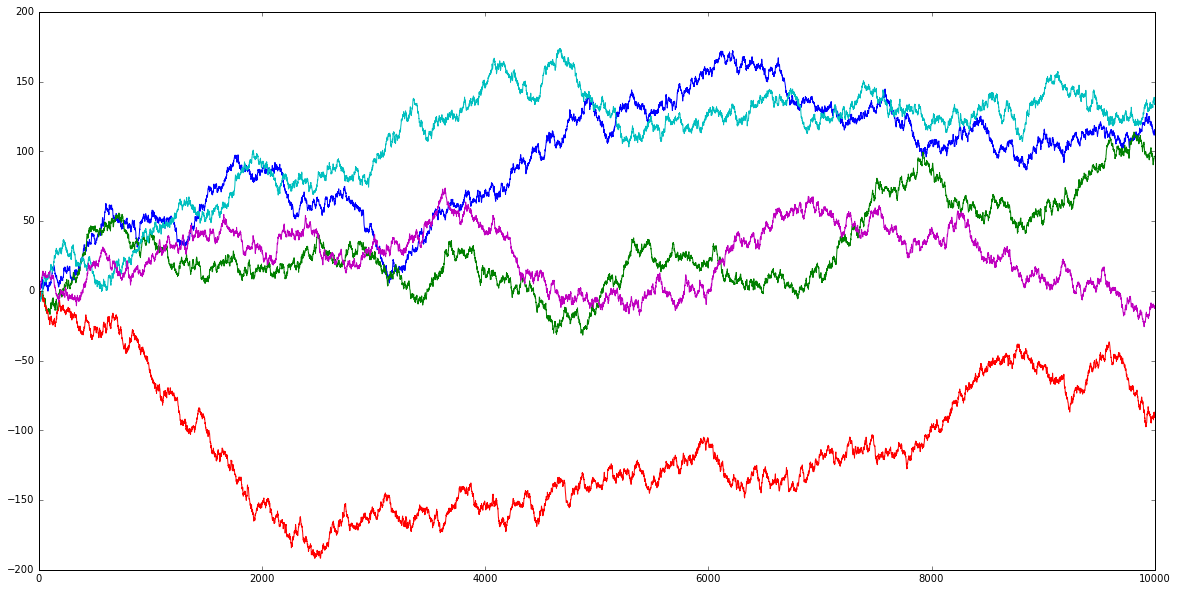

In [3]:
N1=5
X1=np.random.normal(0,1,N*N1)
X1=X1.reshape(N,N1)
    
plt.figure(figsize=(20,10))
S1=np.cumsum(X1,axis=0)
plt.plot(S1);

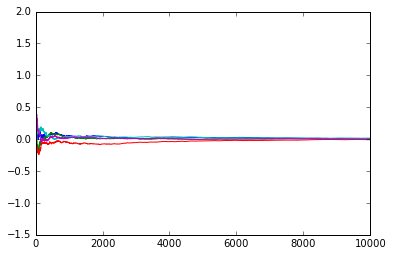

In [4]:
#this is the mean at each step
plt.plot(running_mean(X1,N,N1));

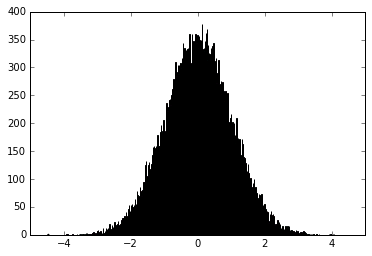

In [5]:
plt.hist(X1,bins=100);

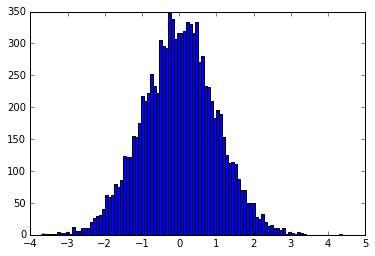

In [6]:
#I sum M1 realizations, and do this M2 times.
# I study how the M2 sums distribute

M1=100
M2=10000
std=10
A1=np.random.normal(0,std,M1*M2)
A1=A1.reshape(M1,M2)
A1_sum=A1.sum(axis=0)/np.sqrt(M1)/std
plt.hist(A1_sum,bins=100);

# Cauchy

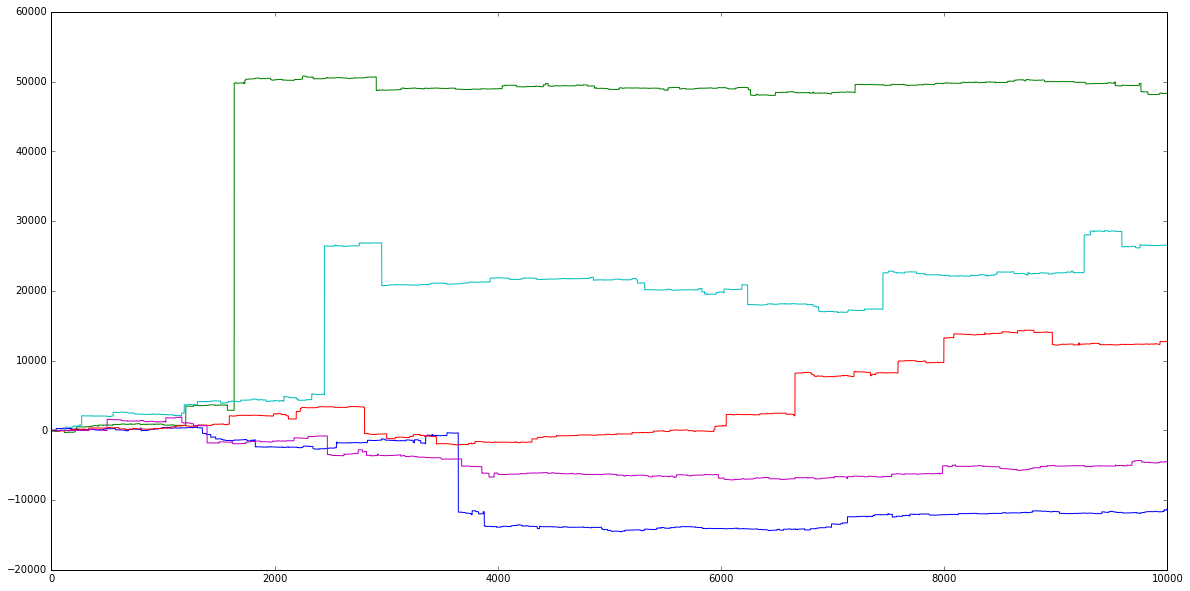

In [7]:
X2=np.random.standard_cauchy(N*N1)
X2=X2.reshape(N,N1)
S2=np.cumsum(X2,axis=0)

plt.figure(figsize=(20,10))
plt.plot(S2);

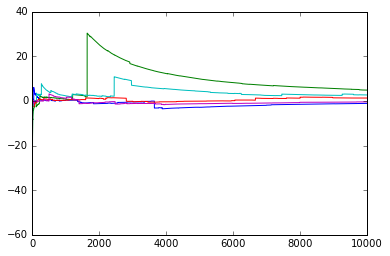

In [8]:
#pdf of the mean should not decay nor diverge; it is always of order 1
plt.plot(running_mean(X2,N,N1));

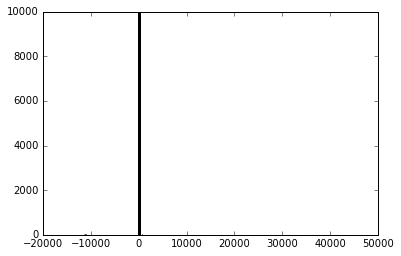

In [9]:
plt.hist(X2,bins=100);

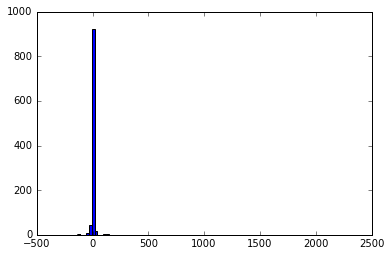

In [10]:
M1=100
M2=1000
A2=np.random.standard_cauchy(M1*M2)
A2=A2.reshape(M1,M2)
A2_sum=A2.sum(axis=0)/(M1)  #should still be cauchy (pdf of the sum)
plt.hist(A2_sum,bins=100);

# Uniform

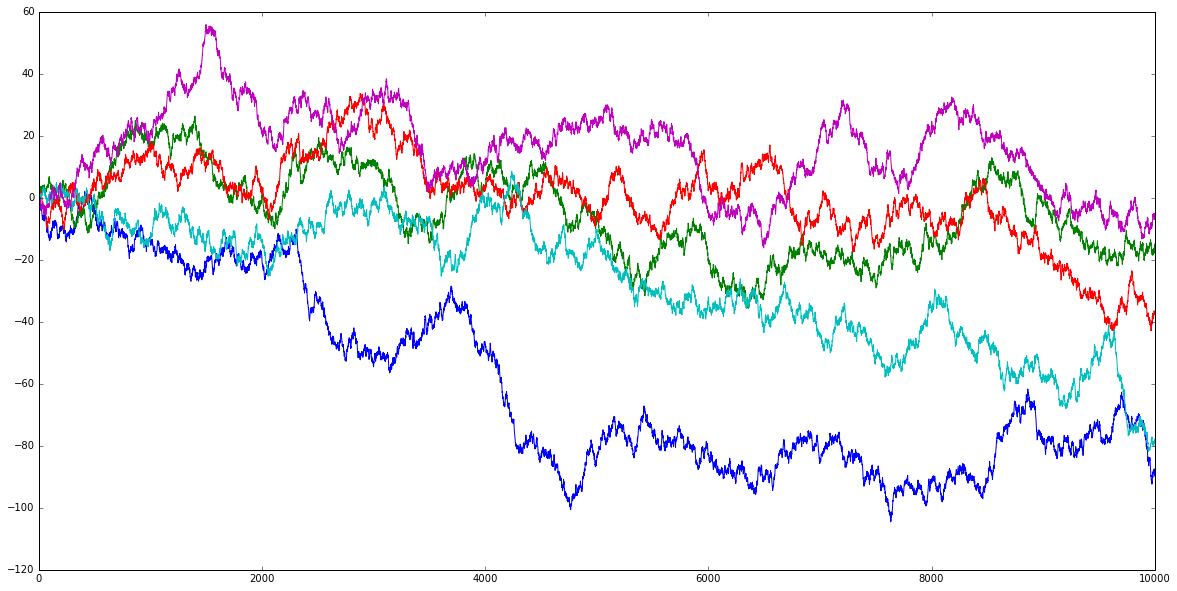

In [11]:
X3=np.random.uniform(-1,1,N*N1)
X3=X3.reshape(N,N1)
S3=np.cumsum(X3,axis=0)

plt.figure(figsize=(20,10))
plt.plot(S3);

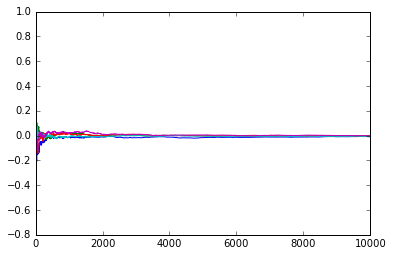

In [12]:
plt.plot(running_mean(X3,N,N1));

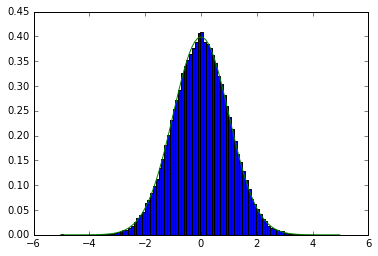

In [13]:
from scipy import stats
M1=100
M2=100000
A3=np.random.uniform(-1,1,M1*M2)
m,v,s,k=stats.uniform.stats(loc=0, scale=2, moments='mvsk')
A3=A3.reshape(M1,M2)
A3_sum=A3.sum(axis=0)/np.sqrt(M1*v)
hist=plt.hist(A3_sum,bins=100,normed=True)


plt.plot(hist[1],stats.norm.pdf(hist[1],0,1),label="gauss")

### corrections from gauss for the uniform

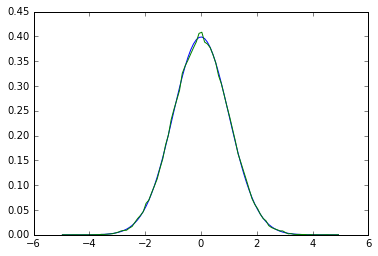

In [14]:
x=np.zeros(len(hist[0]))
for i in range(len(x)):
    x[i]=(hist[1][i]+hist[1][i+1])/2
    

plt.plot(x,stats.norm.pdf(x,0,1),label="gauss")
plt.plot(x,hist[0],label="hist")

In [15]:
h_c=[3,0,-6,0,1]
herm=np.zeros(len(x))
for i in range(5):
    herm+=h_c[i]*x**i
herm*=(k-3)/(24*M1*np.sqrt(v))

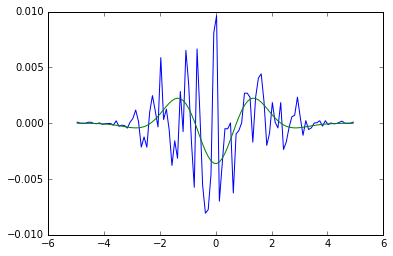

In [16]:
plt.plot(x,hist[0]-stats.norm.pdf(x,0,1),label="difference")
plt.plot(x,herm*stats.norm.pdf(x,0,1))

# Student

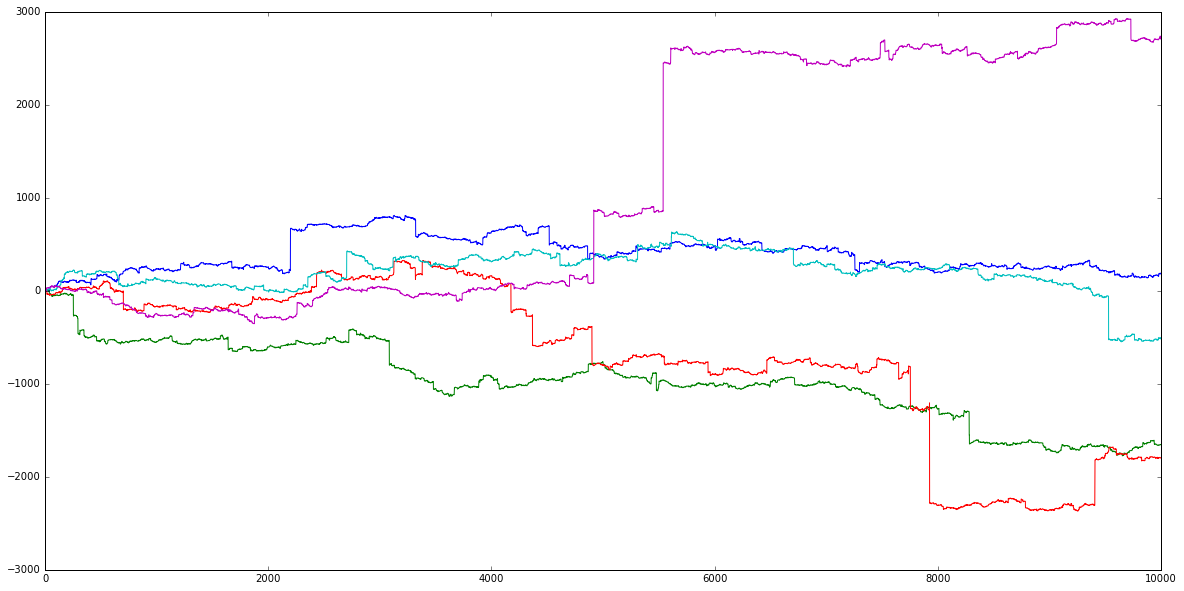

In [17]:
#goes like 1/x^(df+1) for large x (x>>sqrt(df))
#df=1 is the cauchy
#df=inf is the gaussian (wiener)
#df=2 looks like wiener but with jumps

df=1.5
X4=np.random.standard_t(df,N*N1)
X4=X4.reshape(N,N1)
S4=np.cumsum(X4,axis=0)

plt.figure(figsize=(20,10))
plt.plot(S4);

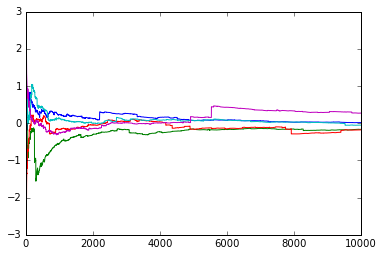

In [18]:
#mean of the series:
#diverges if df<1
#of order 1 if df=1 (cauchy)
# converges for df>1 (law large numbers ok)
plt.plot(running_mean(X4,N,N1));

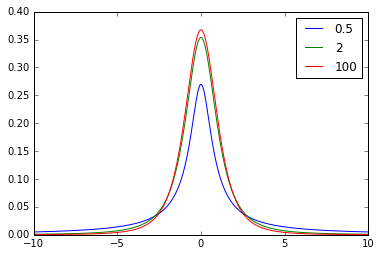

In [19]:
from scipy import stats
x=np.linspace(-10,10,1000)
plt.plot(x,stats.t.pdf(x,0.5),label="0.5")
plt.plot(x,stats.t.pdf(x,2),label="2")
plt.plot(x,stats.t.pdf(x,3),label="100")
plt.legend();

In [20]:
alpha=1
beta=0
#rv = stats.levy_stable(alpha, beta)
#plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

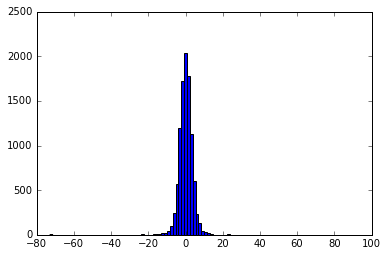

In [21]:
M1=1000
M2=10000
df=2
A4=np.random.standard_t(df,M1*M2)
A4=A4.reshape(M1,M2)
A4_sum=A4.sum(axis=0)/np.sqrt(M1)
plt.hist(A4_sum,bins=100);  

# Compare walks for different time length

### Gauss

In [22]:
N1=5
N2=1000
X1b=np.random.normal(0,1,N2*N1)
X1b=X1b.reshape(N2,N1)
S1b=np.cumsum(X1b)
ratio=N/N2
print(ratio)

10.0


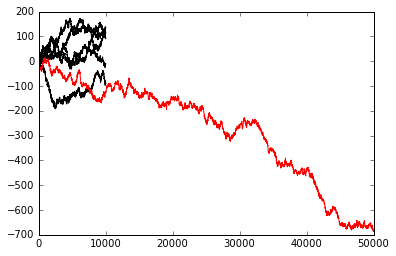

In [23]:
power=1/2

plt.plot(np.arange(0,S1.shape[0]),S1,c='k')
plt.plot(ratio*np.arange(0,S1b.shape[0]),ratio**power*S1b,c='r');


### Cauchy

In [24]:
X2b=np.random.standard_cauchy(N2*N1)
X2b=X2b.reshape(N2,N1)
S2b=np.cumsum(X2b,axis=0)

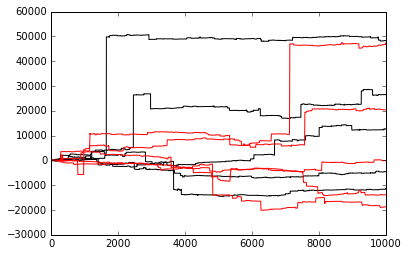

In [25]:
power=1

plt.plot(np.arange(0,S2.shape[0]),S2,c='k')
plt.plot(ratio*np.arange(0,S2b.shape[0]),ratio**power*S2b,c='r');

### Uniform

In [26]:
X3b=np.random.uniform(-1,1,N2*N1)
X3b=X3b.reshape(N2,N1)
S3b=np.cumsum(X3b,axis=0)

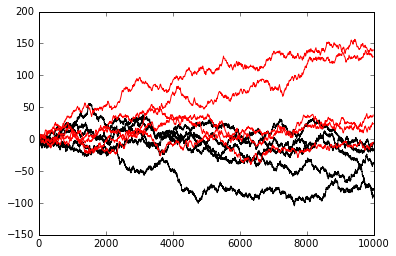

In [27]:
power=1/2

plt.plot(np.arange(0,S3.shape[0]),S3,c='k')
plt.plot(ratio*np.arange(0,S3b.shape[0]),ratio**power*S3b,c='r');

### Student

In [28]:
df=1
N1=10
X4=np.random.standard_t(df,N*N1)
X4=X4.reshape(N,N1)
S4=np.cumsum(X4,axis=0)
X4b=np.random.standard_t(df,N2*N1)
X4b=X4b.reshape(N2,N1)
S4b=np.cumsum(X4b,axis=0)

1.0


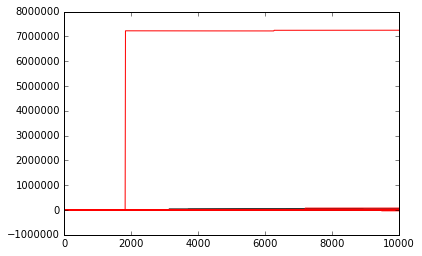

In [29]:
power=1/min(df,2)
print(power)

plt.plot(np.arange(0,S4.shape[0]),S4,c='k')
plt.plot(ratio*np.arange(0,S4b.shape[0]),ratio**power*S4b,c='r');

## Autocorrelation 

In [30]:
SS4=S4.cumsum(axis=1)

/scratch/baruselli/inst/intelpython35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


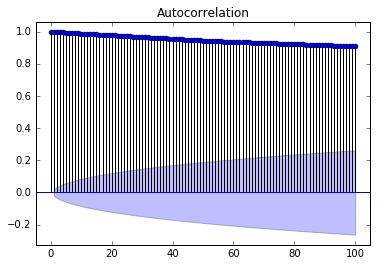

In [31]:
#import statsmodels as sm
#from statsmodels import graphics
import statsmodels.graphics.tsaplots
statsmodels.graphics.tsaplots.plot_acf(S4[:,2],lags=100);

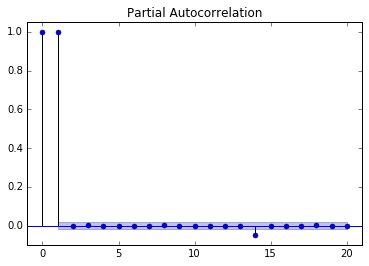

In [32]:
statsmodels.graphics.tsaplots.plot_pacf(S4[:,1],lags=20);

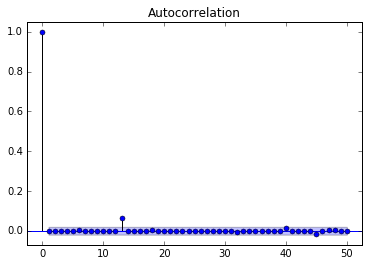

In [33]:
statsmodels.graphics.tsaplots.plot_acf(X4[:,1],lags=50);

In [34]:
import statsmodels.tsa.stattools
acf=statsmodels.tsa.stattools.acf(SS4[:,0],nlags=10)
acf

array([1.        , 0.99894413, 0.99788242, 0.99681505, 0.9957473 ,
       0.99466862, 0.99359559, 0.99252591, 0.99145309, 0.99038864,
       0.98932165])

In [35]:
pacf=statsmodels.tsa.stattools.pacf(SS4[:,0],nlags=10)
pacf

array([ 1.00000000e+00,  9.99044033e-01, -3.63397776e-03, -3.53257673e-03,
       -7.70234798e-04, -6.29614683e-03,  2.40304976e-03,  1.18104443e-03,
       -2.25675492e-03,  3.82809652e-03, -1.96883589e-03])

### MA model

(9997,)


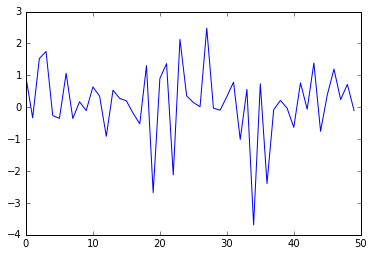

In [36]:
betas=np.array((1,-0.5,0.3,0.2))   #beta[0] is always one
MA1=np.convolve(X1[:,0],betas,mode='valid')
print(MA1.shape)
plt.plot(MA1[:50]);

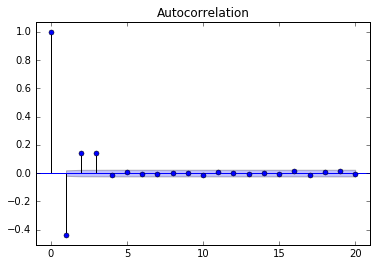

In [37]:
statsmodels.graphics.tsaplots.plot_acf(MA1,lags=20);

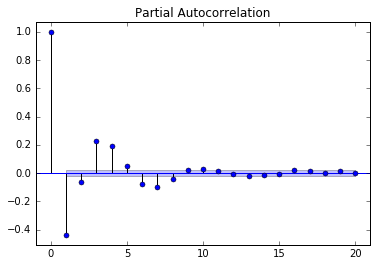

In [38]:
statsmodels.graphics.tsaplots.plot_pacf(MA1,lags=20);

### AR model

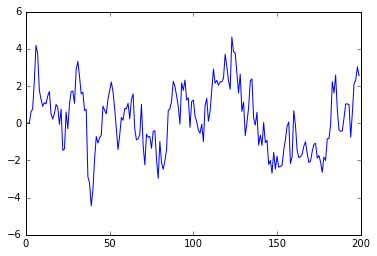

In [39]:
#alfas=np.array((0,1,-0.5))   #exa. 3.1 chapfield
alfas=np.array((0,0.8,0))   #alfa[0] is not used, since the alphas start from 1
Z=X1[:,0]
AR1=np.zeros(len(Z))
for t in range(len(alfas),len(Z)):
    for p in range(1,len(alfas)):
        AR1[t]+=AR1[t-p]*alfas[p]
    AR1[t]+=Z[t]
    
plt.plot(AR1[:200]);

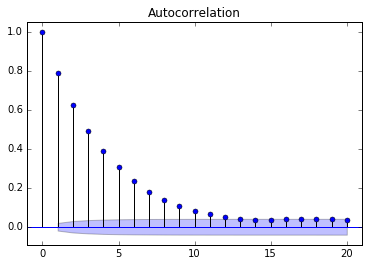

In [40]:
statsmodels.graphics.tsaplots.plot_acf(AR1,lags=20);

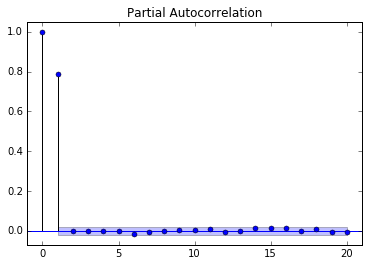

In [41]:
statsmodels.graphics.tsaplots.plot_pacf(AR1,lags=20);

### ARMA

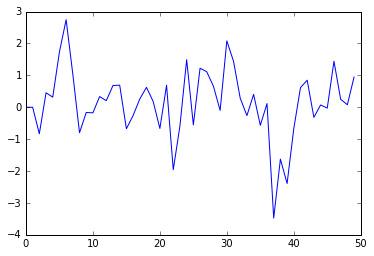

In [95]:
def generate_arma(Z,alfas,betas):
    """given noise Z and parameters alfa_p, beta_q, generate an ARMA process"""
    import numpy as np
    if np.abs(betas[0]-1)>1e-8: print ("warning beta_0 is not 1, but", betas[0])
    ARMA1=np.zeros(len(Z))
    for t in range(len(alfas),len(Z)):
        for p in range(1,len(alfas)):
            ARMA1[t]+=ARMA1[t-p]*alfas[p]
        for q in range(len(betas)):
            ARMA1[t]+=betas[q]*Z[t-q]
    return ARMA1
    
alfas=np.array((0,0.5,))   #AR, first is ignored
betas=np.array((1,-0.3,))   #MA, first is 1
ARMA1=generate_arma(X1[:,0],alfas,betas)
plt.plot(ARMA1[:50]);

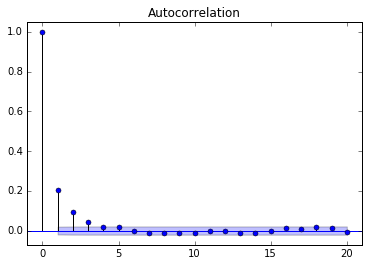

In [80]:
statsmodels.graphics.tsaplots.plot_acf(ARMA1,lags=20);

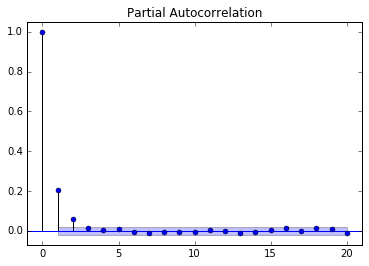

In [71]:
statsmodels.graphics.tsaplots.plot_pacf(ARMA1,lags=20);

### ARIMA
I integrate results from the ARMA model

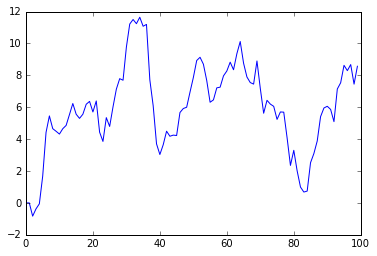

In [45]:
ARIMA1=np.cumsum(ARMA1)
plt.plot(ARIMA1[:100]);

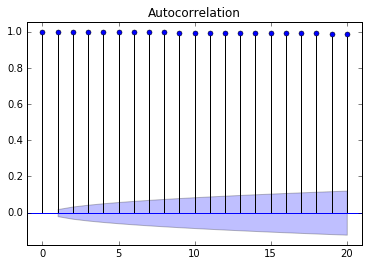

In [46]:
statsmodels.graphics.tsaplots.plot_acf(ARIMA1,lags=20);

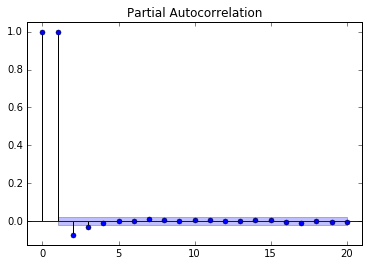

In [47]:
statsmodels.graphics.tsaplots.plot_pacf(ARIMA1,lags=20);

## Estimation of the parameters

(9997,)


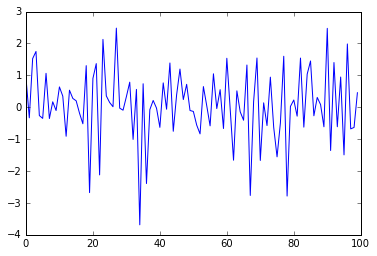

In [48]:
print(MA1.shape)
plt.plot(ARMA1[:100])

In [72]:
import pyramid
from pyramid.arima import ARIMA
import warnings
warnings.filterwarnings('ignore', '.*Conversion*',)

In [113]:
# fitting a stepwise model:
from pyramid.arima import auto_arima

fit = auto_arima(ARMA1, start_p=0, start_q=0, max_p=3, max_q=3,
                          seasonal=False, d=0, trace=True,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=False)  # set to stepwise

Fit ARIMA: order=(0, 0, 0); AIC=28534.535, BIC=28548.956, Fit time=0.003 seconds
Fit ARIMA: order=(0, 0, 1); AIC=28169.062, BIC=28190.693, Fit time=0.072 seconds
Fit ARIMA: order=(0, 0, 2); AIC=28101.750, BIC=28130.591, Fit time=0.116 seconds
Fit ARIMA: order=(0, 0, 3); AIC=28088.570, BIC=28124.621, Fit time=0.156 seconds
Fit ARIMA: order=(1, 0, 0); AIC=28116.401, BIC=28138.032, Fit time=0.065 seconds
Fit ARIMA: order=(1, 0, 1); AIC=28083.133, BIC=28111.974, Fit time=1.438 seconds
Fit ARIMA: order=(1, 0, 2); AIC=28085.129, BIC=28121.180, Fit time=1.730 seconds
Fit ARIMA: order=(1, 0, 3); AIC=28087.115, BIC=28130.377, Fit time=2.095 seconds
Fit ARIMA: order=(2, 0, 0); AIC=28085.845, BIC=28114.687, Fit time=0.099 seconds
Fit ARIMA: order=(2, 0, 1); AIC=28085.129, BIC=28121.180, Fit time=1.532 seconds
Fit ARIMA: order=(2, 0, 2); AIC=28086.241, BIC=28129.503, Fit time=4.005 seconds
Fit ARIMA: order=(2, 0, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 0); AIC=28085.198,

In [114]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                     ARMA(1, 1)   Log Likelihood              -14037.566
Method:                       css-mle   S.D. of innovations              0.985
Date:                Mon, 29 Jan 2018   AIC                          28083.133
Time:                        15:05:16   BIC                          28111.974
Sample:                             0   HQIC                         28092.895
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0163      0.013      1.213      0.225      -0.010       0.043
ar.L1.y        0.4713      0.040     11.797      0.000       0.393       0.550
ma.L1.y       -0.2809      0.043     -6.464      0.000      -0.366      -0.196
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.1220           +0.0000j            2.1220            0.0000
MA.1            3.5603           +0.0000j            3.5603            0.0000
-----------------------------------------------------------------------------
"""

In [117]:
fit.params()

array([ 0.01625001,  0.47125571, -0.28087127])

### residuals 
I can recover the original noise

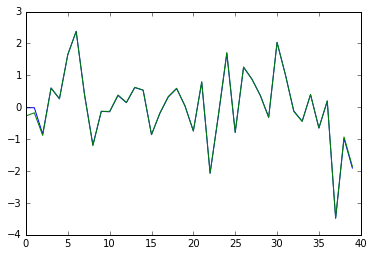

In [118]:
plt.plot(fit.resid()[:40])
plt.plot(Z[:40])

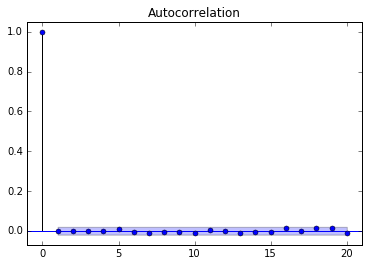

In [144]:
statsmodels.graphics.tsaplots.plot_acf(fit.resid(),lags=20);

Let's now underfit a (1,0,1) with a (0,0,1)

In [135]:
alfas=(0,0.8)
betas=(1,0.5)
ARMA2=generate_arma(X1[:,1],alfas,betas)

In [136]:
fit2 = ARIMA((0,0,1)).fit(ARMA2)
fit2.params()

array([0.07225249, 0.85606633])

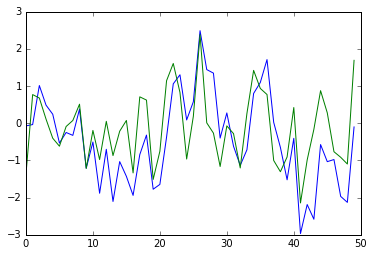

In [138]:
plt.plot(fit2.resid()[:50])
plt.plot(X1[:50,1])

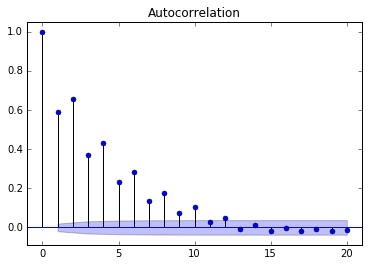

In [139]:
statsmodels.graphics.tsaplots.plot_acf(fit2.resid(),lags=20);

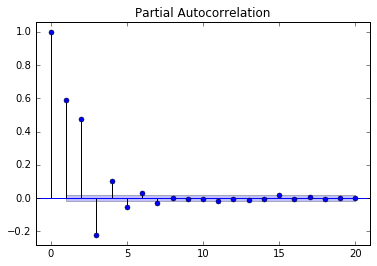

In [140]:
statsmodels.graphics.tsaplots.plot_pacf(fit2.resid(),lags=20);

and with a (1,0,0)

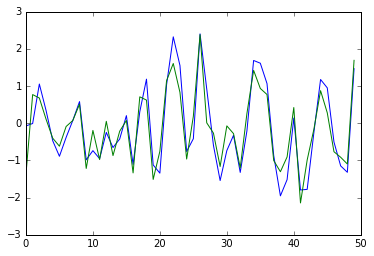

In [141]:
fit2b = ARIMA((1,0,0)).fit(ARMA2)
fit2b.params()
plt.plot(fit2b.resid()[:50])
plt.plot(X1[:50,1])

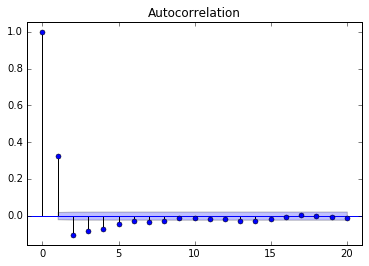

In [142]:
statsmodels.graphics.tsaplots.plot_acf(fit2b.resid(),lags=20);

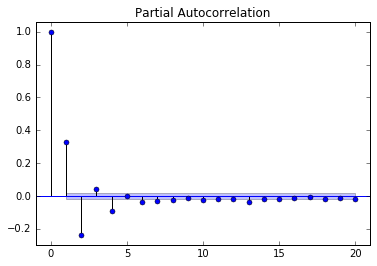

In [143]:
statsmodels.graphics.tsaplots.plot_pacf(fit2b.resid(),lags=20);